In [1]:
import numpy as np
from tqdm import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
id2amino = {
    0: 'A', 1: 'R', 2: 'N', 3: 'D', 4: 'C',
    5: 'Q', 6: 'E', 7: 'G', 8: 'H', 9: 'I',
    10: 'L', 11: 'K', 12: 'M', 13: 'F', 14: 'P',
    15: 'S', 16: 'T', 17: 'W', 18: 'Y', 19: 'V'
}

amino2id = {
    'A': 0, 'R': 1, 'N': 2, 'D': 3, 'C': 4,
    'Q': 5, 'E': 6, 'G': 7, 'H': 8, 'I': 9,
    'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14,
    'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19
}

In [3]:
with open('./data/train_valid_list', 'r') as tvf, open('./data/test_list', 'r') as tf:
    tvf_lines = tvf.readlines()
    tf_lines = tf.readlines()

tvf_data_list = [d.strip() for d in tvf_lines]
tf_data_list = [d.strip() for d in tf_lines]

In [4]:
tvf_ratio_list = list()
for pdb in tqdm_notebook(tvf_data_list):
    target = np.load(f'./data/target/{pdb}.npy')
    graph = np.load(f'./data/pf2/{pdb}.npy')
    ratio_matrix = np.zeros((20, 20))

    row_index, column_index = np.where(graph >= 2 / 3)

    for row, column in zip(row_index, column_index):
        row_amino, column_amino = target[row], target[column]
        ratio_matrix[int(row_amino)][int(column_amino)] += 1

    h = ratio_matrix.trace() / np.sum(ratio_matrix)
    tvf_ratio_list.append(h)

In [5]:
tf_ratio_list = list()
for pdb in tqdm_notebook(tf_data_list):
    target = np.load(f'./data/target/{pdb}.npy')
    graph = np.load(f'./data/pf2/{pdb}.npy')
    ratio_matrix = np.zeros((20, 20))

    row_index, column_index = np.where(graph >= 2 / 3)

    for row, column in zip(row_index, column_index):
        row_amino, column_amino = target[row], target[column]
        ratio_matrix[int(row_amino)][int(column_amino)] += 1

    h = ratio_matrix.trace() / np.sum(ratio_matrix)
    tf_ratio_list.append(h)

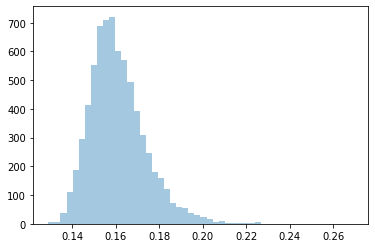

In [16]:
tvf_ax = sns.distplot(tvf_ratio_list, kde=False, norm_hist=False)
tvf_png = tvf_ax.get_figure()
tvf_png.savefig('train_ratio.png', dpi=400)

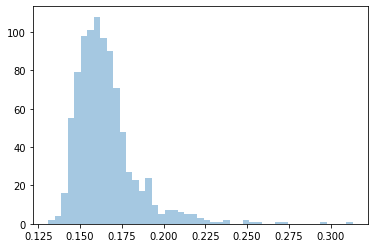

In [17]:
tf_ax = sns.distplot(tf_ratio_list, kde=False, norm_hist=False)
tf_png = tf_ax.get_figure()
tf_png.savefig('test_ratio.png', dpi=400)

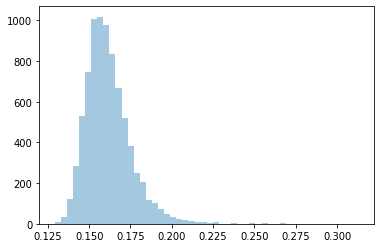

In [19]:
total_ratio_list = tvf_ratio_list + tf_ratio_list
total_ax = sns.distplot(total_ratio_list, kde=False, norm_hist=False)
total_png = total_ax.get_figure()
total_png.savefig('total_ratio.png', dpi=400)

In [23]:
print(f'total number of list = {len(total_ratio_list)}')
print(f'median ratio = {np.median(total_ratio_list)}')
print(f'min ratio = {min(total_ratio_list)}')
print(f'max ratio = {max(total_ratio_list)}')
print(f'average ratio = {np.mean(total_ratio_list)}')
print(f'std ratio = {np.std(total_ratio_list)}')

total number of list = 8056
median ratio = 0.15947912182818133
min ratio = 0.12904453749524172
max ratio = 0.3132075471698113
average ratio = 0.16155283663502734
std ratio = 0.013932286620054652
